### Sample from historical distributions

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

In [197]:
google = pd.read_csv('../../data/googl.csv')
msft = pd.read_csv('../../data/msft.csv')
jpm = pd.read_csv('../../data/jpm.csv')
sp500 = pd.read_csv('../../data/sp500.csv')

google.head()

,Date,Open,High,Low,Close,Volume
0,2005-01-03,98.80,101.92,97.83,101.46,15860692
1,2005-01-04,100.77,101.57,96.84,97.35,13762396
2,2005-01-05,96.82,98.55,96.21,96.85,8239545
3,2005-01-06,97.72,98.05,93.95,94.37,10389803
4,2005-01-07,95.42,97.22,94.48,97.02,9666175


In [198]:
r_g = google.Close.pct_change()[1:]
r_m = msft.Close.pct_change()[1:]
r_j = jpm.Close.pct_change()[1:]
r_sp = sp500.Close.pct_change()[1:]

In [159]:
'''
P: list of historical returns
t_horizon: number of returns to sample
n_iter: number of iterations
'''
def sample_historical(P, t_horizons, n_iter):
    # sort list of historical returns
    P = sorted(P,reverse=False)
    
    sample = np.zeros(t_horizons*n_iter).reshape((n_iter, t_horizons))
    for i in range(n_iter):
        sample_i = np.zeros(t_horizons)
        
        for t in range(t_horizons):  
            # generate uniform samples in above range
            R = np.random.uniform(0, 1)
            sample_i[t] = P[int(len(P)*R)]
                      
        sample[i,] = sample_i
            
    return sample


In [203]:
# test
sample = sample_historical(r_sp, 15, 20)
np.save('test.npy', sample)

In [204]:
np.load('test.npy')

array([[  1.69137399e-03,   8.19451183e-03,  -1.06450926e-03,
          1.15004217e-03,   4.70655271e-02,   0.00000000e+00,
         -1.43644097e-02,  -1.25496569e-02,   1.14354499e-02,
         -2.38141524e-03,  -6.74940126e-03,   3.76247342e-03,
         -5.04532913e-03,   1.06247344e-04,   7.94540084e-03],
       [  7.03320484e-03,   9.31249494e-03,  -4.32061153e-03,
         -3.33137370e-03,  -1.08790252e-04,   9.34243622e-04,
          3.93371276e-03,  -1.89295039e-02,  -9.13475592e-03,
          6.56712291e-03,  -3.91610248e-03,   5.77988915e-03,
          1.22851868e-02,   9.53567492e-03,   1.39400022e-02],
       [  2.36905951e-02,   1.16895963e-03,  -7.30994152e-04,
          5.96094553e-02,  -4.62897023e-03,   2.19282216e-04,
          5.41661094e-03,   1.06698281e-02,  -3.74623341e-03,
          3.54386518e-03,   8.24917508e-03,   1.05226236e-03,
          7.77934936e-04,   0.00000000e+00,   9.80488283e-04],
       [  1.49190111e-03,  -1.40644303e-02,  -1.09765524e-02,
     

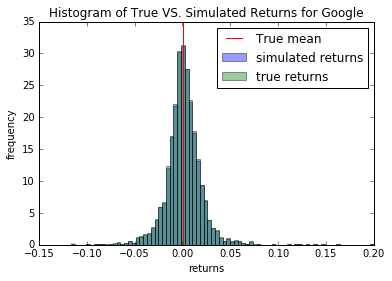

In [194]:
t_horizons=100
n_iter = 200
sample = sample_historical(r_g, t_horizons, n_iter).reshape(t_horizons*n_iter)
plt.hist(sample, bins=80,  normed=1,color='b', alpha = 0.4, label = "simulated returns")
plt.hist(r_g, bins=80,  normed=1, color='g', alpha = 0.4, label = "true returns")
plt.axvline(np.mean(r_g), color="r", label='True mean')
plt.title('Histogram of True VS. Simulated Returns for Google')  
plt.xlabel('returns')  
plt.ylabel('frequency')  
plt.legend() 

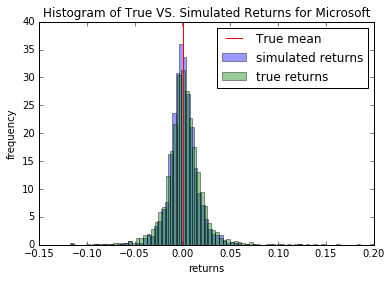

In [195]:
t_horizons=100
n_iter = 200
sample = sample_historical(r_m, t_horizons, n_iter).reshape(t_horizons*n_iter)
plt.hist(sample, bins=80,  normed=1,color='b', alpha = 0.4, label = "simulated returns")
plt.hist(r_g, bins=80,  normed=1, color='g', alpha = 0.4, label = "true returns")
plt.axvline(np.mean(r_m), color="r", label='True mean')
plt.title('Histogram of True VS. Simulated Returns for Microsoft')  
plt.xlabel('returns')  
plt.ylabel('frequency')  
plt.legend() 

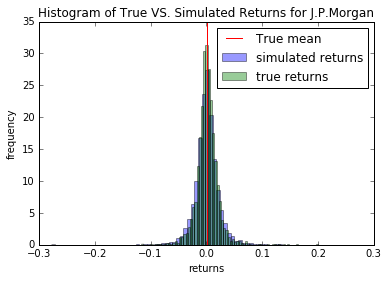

In [196]:
t_horizons=100
n_iter = 200
sample = sample_historical(r_j, t_horizons, n_iter).reshape(t_horizons*n_iter)
plt.hist(sample, bins=80,  normed=1,color='b', alpha = 0.4, label = "simulated returns")
plt.hist(r_g, bins=80,  normed=1, color='g', alpha = 0.4, label = "true returns")
plt.axvline(np.mean(r_j), color="r", label='True mean')
plt.title('Histogram of True VS. Simulated Returns for J.P.Morgan')  
plt.xlabel('returns')  
plt.ylabel('frequency')  
plt.legend() 